## Captioning images with Moondream

- <https://moondream.ai/docs>

In [ ]:
%pip install -q transformers einops

In [ ]:
%pip install -q requests

In [ ]:
%pip install -q filetype

In [ ]:
from PIL import Image

In [ ]:
image_urls = [
  "https://ranton-example-files.s3.us-west-2.amazonaws.com/reading.jpg",
  "https://ranton-example-files.s3.us-west-2.amazonaws.com/lighthouse.png",
  "https://ranton-example-files.s3.us-west-2.amazonaws.com/birds.jpg"
]

In [ ]:
import requests

In [ ]:
def download_file(url, filename):
  response = requests.get(url)
  with open(filename, mode="wb") as file:
    file.write(response.content)
  print(f"Downloaded {url} to file {filename}")

In [ ]:
import filetype
import os

In [ ]:
image_files = []
for idx, url in enumerate(image_urls):
  filename = f"image_{idx}"
  download_file(url, filename)

  print(os.stat(filename))
  kind = filetype.guess(filename)
  if kind is None:
    print('Cannot guess file type for', filename)
    continue

  print('File extension: %s' % kind.extension)
  print('File MIME type: %s' % kind.mime)
  newname = f"{filename}.{kind.extension}"
  os.rename(filename, newname)
  print(f"Renamed {filename} to {newname}")
  image_files.append(newname)


Downloaded https://ranton-example-files.s3.us-west-2.amazonaws.com/reading.jpg to file image_0
os.stat_result(st_mode=33188, st_ino=7084290, st_dev=62, st_nlink=1, st_uid=0, st_gid=0, st_size=88407, st_atime=1730387291, st_mtime=1730387291, st_ctime=1730387291)
File extension: jpg
File MIME type: image/jpeg
Renamed image_0 to image_0.jpg
Downloaded https://ranton-example-files.s3.us-west-2.amazonaws.com/lighthouse.png to file image_1
os.stat_result(st_mode=33188, st_ino=7084368, st_dev=62, st_nlink=1, st_uid=0, st_gid=0, st_size=804560, st_atime=1730387291, st_mtime=1730387291, st_ctime=1730387291)
File extension: png
File MIME type: image/png
Renamed image_1 to image_1.png
Downloaded https://ranton-example-files.s3.us-west-2.amazonaws.com/birds.jpg to file image_2
os.stat_result(st_mode=33188, st_ino=7084301, st_dev=62, st_nlink=1, st_uid=0, st_gid=0, st_size=254762, st_atime=1730387291, st_mtime=1730387291, st_ctime=1730387291)
File extension: jpg
File MIME type: image/jpeg
Renamed i

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

In [ ]:
model_id = "vikhyatk/moondream2"
revision = "2024-07-23"

model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, revision=revision)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)



config.json:   0%|          | 0.00/319 [00:00<?, ?B/s]

configuration_moondream.py:   0%|          | 0.00/3.34k [00:00<?, ?B/s]

moondream.py:   0%|          | 0.00/5.38k [00:00<?, ?B/s]

modeling_phi.py:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

vision_encoder.py:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.73G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [ ]:
if tokenizer.pad_token is None:
  tokenizer.pad_token = tokenizer.eos_token
model.generation_config.pad_token_id = tokenizer.pad_token_id

In [ ]:
def process_image(filename):
  image = Image.open(filename)
  scale =  256 / float(image.width)
  display(image.resize(( int(image.width * scale), int(image.height * scale))))

  enc_image = model.encode_image(image)
  description = model.answer_question(enc_image, "Describe this image.", tokenizer)
  display(description)

Scale: 0.23703703703703705


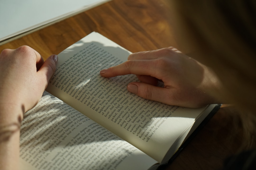

"A close-up photo of a person's hands holding open a book with text on the pages, positioned on a wooden surface with sunlight casting shadows."

Scale: 0.22377622377622378


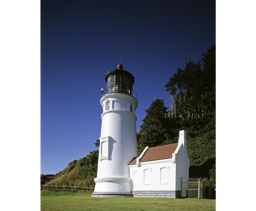

'The image features a white lighthouse with a black top, standing on a grassy area with a clear blue sky in the background.'

Scale: 0.26750261233019856


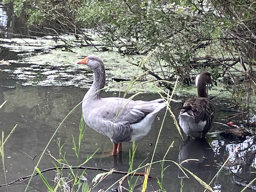

'The image shows two ducks in a pond with green vegetation in the background.'

In [ ]:
for image_filename in image_files:
  process_image(image_filename)